In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [32]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr.train import LTRTrain
from scripts.models.ltr.metrics import LTRMetrics

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Entrenamiento

In [5]:
ltr_params = {
    'key_events': ['goal', 'red_card', 'penalty'],
    'lags': [1, 3, 5],
    'target_metric': 'rouge',
    'drop_teams': True,
    'lemma': True,
    'metric_params': {'rouge_mode': 'rouge-1', 'rouge_metric': 'r'},
    'count_vec_kwargs': {'ngram_range': (1, 2), 'strip_accents': 'unicode'}
}
cat_features_dict = {'is_key_event': [0, 1],
                     'n_players_cat': ['no_player', 'one_player', 'more_than_one_player']}
num_features = ['tfidf_sum']
model_params = {
    'n_estimators': 100,
    'max_depth': 2,
    'bootstrap': True,
    
}

In [ ]:
# Uncomment if using cv
"""
model_params = {
    'n_estimators': [100, 200],
    'max_depth': [2, 5],
    'bootstrap': [True],
    
}
cv = 5
opt_metric = 'neg_mean_squared_error'
ltr_train = LTRTrain(cat_features=cat_features, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params,
                    cv=cv, opt_metric=opt_metric)
"""

In [6]:
ltr_train = LTRTrain(cat_features_dict=cat_features_dict, num_features=num_features,
                     model_params=model_params, ltr_params=ltr_params)

Setting target metric to rouge


In [166]:
%%time
ltr_train.train()

Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/341d2aa93d/train.csv
Categorizing n_players...
Computing new length...
Dropping {'length', 'position', 'total_length', 'players_importance', 'sim_previous_3', 'json_file', 'score', 'n_stop', 'equalize', 'sim_previous_1', 'url', 'sim_previous_5', 'n_players', 'sentence_ix', 'advantage', 'event_ix'}
Training model...
Writing model to /home/carlos/MasterDS/tfm/models/ltr_random_forest/8a68cad9f5/ckpt.pickle
Writing model info to /home/carlos/MasterDS/tfm/models/ltr_random_forest/8a68cad9f5/model_info.pickle
CPU times: user 9.15 s, sys: 15.2 ms, total: 9.17 s
Wall time: 9.16 s


## Salida

In [15]:
model = ltr_train.read_model()

In [13]:
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(categories=[[0,
                                                                                              1],
                                                                                             ['no_player',
                                                                                              'one_player',
                                                                                              'more_than_one_player']],
                                                                                 drop='first'))]),
                                                  ['is_key_event',
                                                   'n_players_cat'])])),
  

In [14]:
model_info = ltr_train.read_model_info()

El número de jugadores no aporta nada

In [15]:
# La salida de mse de una etapa de cv en sklearn es negativa
model_info

{'best_score': None,
 'best_params': None,
 'model_out':                          Gini-importance
 x0_1                            0.255742
 x1_one_player                   0.000000
 x1_more_than_one_player         0.000000
 tfidf_sum                       0.744258}

In [16]:
model_info['model_out']

,Gini-importance
x0_1,0.255742
x1_one_player,0.000000
x1_more_than_one_player,0.000000
tfidf_sum,0.744258


## Métricas

In [33]:
ltr_metrics = LTRMetrics(ltr_train)

In [34]:
ltr_metrics.run()

Calculating train metrics...
Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/341d2aa93d/train.csv
Categorizing n_players...
Computing new length...
Dropping {'n_players', 'sim_previous_1', 'advantage', 'event_ix', 'equalize', 'n_stop', 'sim_previous_5', 'length', 'json_file', 'total_length', 'score', 'url', 'sim_previous_3', 'players_importance', 'sentence_ix', 'position'}
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_random_forest/8a68cad9f5/train_metrics.pickle
Calculating validation metrics...
Reading /home/carlos/MasterDS/tfm/data/csv/summaries/ltr/features_targets/341d2aa93d/validation.csv
Categorizing n_players...
Computing new length...
Dropping {'n_players', 'sim_previous_1', 'advantage', 'event_ix', 'equalize', 'n_stop', 'sim_previous_5', 'length', 'json_file', 'total_length', 'score', 'url', 'sim_previous_3', 'players_importance', 'sentence_ix', 'position'}
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_random_forest/8a68cad9f5/val

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_random_forest/8a68cad9f5/train_metrics.pickle
mse : 0.015622374349301927
mae : 0.08634063597344009
r2 : 0.16138178602099607


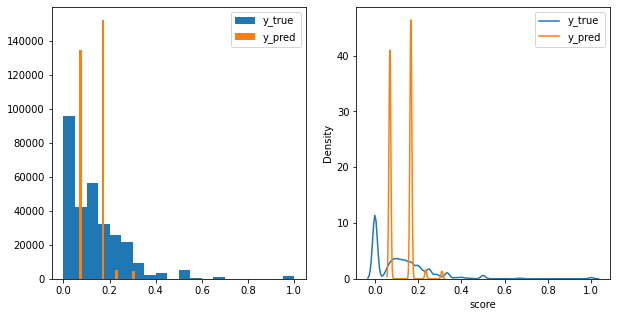

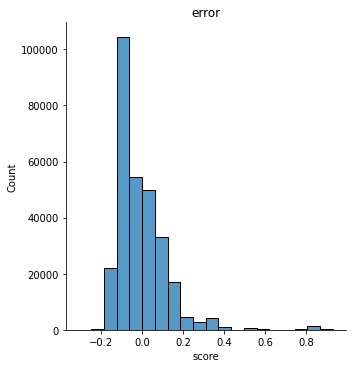

In [58]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_random_forest/8a68cad9f5/validation_metrics.pickle
mse : 0.015375390810075103
mae : 0.08612893875815486
r2 : 0.16503697296038844


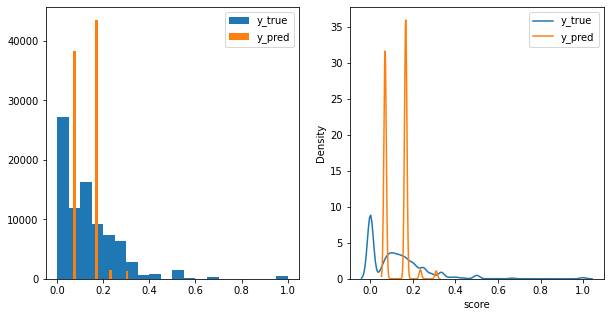

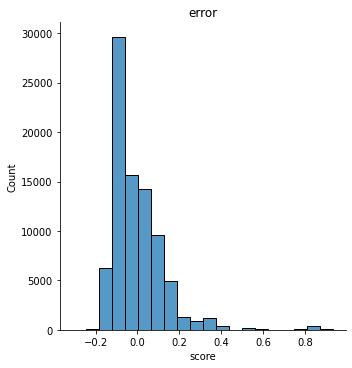

In [59]:
ltr_metrics.show_metrics('validation')